# 第六回：场景案例显神通

数据可视化的图表种类繁多，各式各样，因此我们需要掌握如何在特定场景下使用特定的图表。
数据可视化是为业务目的服务的，好的可视化图表可以起到清晰准确反映业务结果的目的，在选择使用何种图表时，通常我们需要首先考虑你想通过可视化阐述什么样的故事，受众是谁，以及打算如何分析结果。  
关于如何利用数据创造出吸引人的、信息量大的、有说服力的故事，进而达到有效沟通的目的，可以进一步阅读这本书[《用数据讲故事》](https://book.douban.com/subject/27108685/)学习。   
本章将介绍不同场景适合的可视化图表类型，使用注意事项，以及如何用现成的绘图接口来呈现。  
我们将常见的场景分为5大类：  
1）展示趋势变化（Evolution）  
2）展示分布关系（Distribution）  
3）展示相关关系（Correlation）  
4）展示排序信息（Ranking）  
5）展示组成关系（Part of a whole）  

## 一、展示趋势变化（Evolution）

### 1. 折线图 - Line chart

线图（也叫折线图）是众多图表中的基本图形。它由一系列的**数据点**和连接这些数据点的**线段**组成。  
它的形式和散点图类似，区别是  
①线图的数据点通常是**有序排列**的(一般按X轴的值顺序)   
②线图多了**线段**连接数据点。  
③线图是描述趋势变化的，散点图是描述两个变量的相关性的。      
    
线图常用来呈现**时间趋势**的变化(时间序列)，所以X轴通常代表某个时间间隔。  
  
**注意事项**
1. X轴的数据必须是**有序**的
1. 是否需要截断Y轴，即Y轴是否必须要从0点开始？    
2. 如果要比较两个或多个不同的变量的变化趋势，不要使用双Y轴图表  
3. 小心有很多线条的线图(spaghetti chart-意大利面条图),太多的线条会让图表变得混乱、无法阅读；建议使用多子图形式或重点突出某一个种类  
  
线图可以直接用`pyplot.plot`函数绘制，只输入一列数的话会默认为Y轴的值，然后自动生成X轴；亦可输入两列数分别代表X轴和Y轴。  
具体用法和常用参数见下面参考代码

#### 简单线图

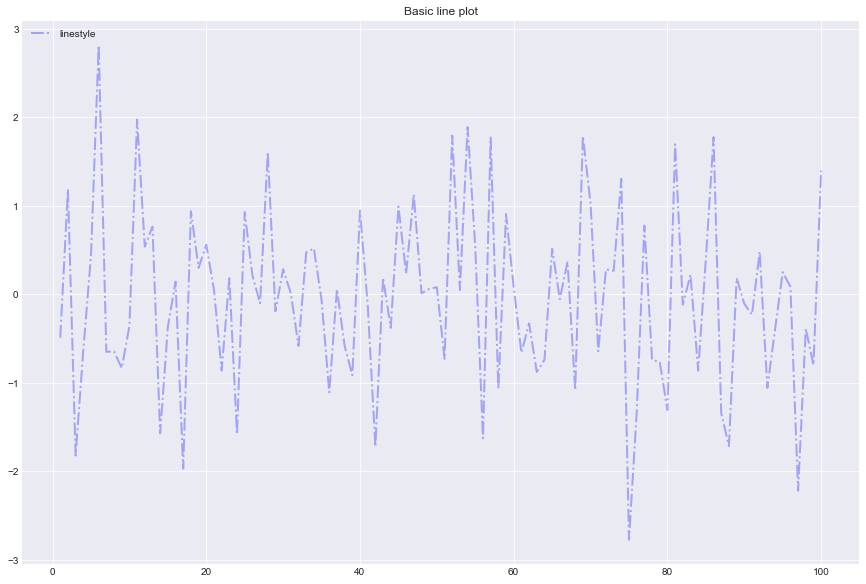

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# 创建数据，分别对应X轴和Y轴，注意X轴要是有序排列的
df=pd.DataFrame({'xdata': range(1,101), 'ydata': np.random.randn(100) })

# 绘图
plt.style.use('seaborn-darkgrid') # 也可以选择其他的风格式样 seaborn-whitegrid
plt.figure(figsize=(15, 10)) # 设置画布大小

# color：    控制线条颜色，red/skyblue/blue 等
# alpha：    控制线条透明度
# linestyle：控制线条式样，'--'， '-'， '-.'， ':' 等
# linewidth：控制线条粗细大小
plt.plot( 'xdata', 'ydata', data=df, color='blue',alpha=0.3, linestyle='-.', linewidth=2, label='linestyle')
plt.legend(loc='upper left', frameon=False) # 设置标签
plt.title('Basic line plot') # 设置标题
plt.show()


#### 突出某一重点的多线图

下面是正常的多线图：  
需要注意的是，这里只有5条线，尚能看清楚，但是如果如果超过5条，10条甚至更多的时候，花在一张图上基本看不到什么有效信息。这时候我们可以采取两种办法：  
1. 还是在一张图上，突出其中一条或两条线，其他都是作为背景的灰色
2. 几条线画几个子图

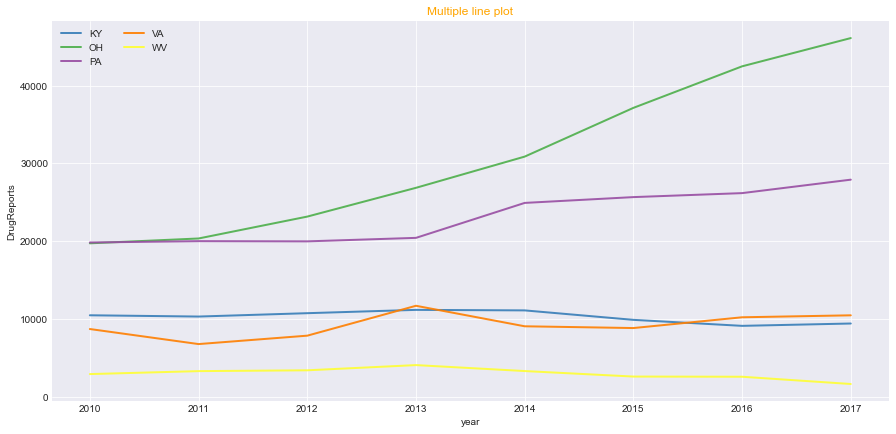

In [2]:
# 导入包
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# 导入数据集并转成方便作图的格式
Dataset = pd.read_csv('data/Drugs.csv')
group = Dataset.groupby(['YYYY','State']).agg('sum').reset_index()
df = group.pivot(index='YYYY', columns='State', values='DrugReports').reset_index()

# 设定式样
plt.style.use('seaborn-darkgrid')
 
# 创建调色板， 色卡用来控制每条线的颜色
palette = plt.get_cmap('Set1')

# 绘图
plt.figure(figsize=(15, 7))
num=0
for column in df.drop('YYYY', axis=1):
    num += 1
    plt.plot(df['YYYY'], df[column], marker='', color=palette(num), linewidth=2, alpha=0.9, label=column)
    
plt.legend(loc=2, ncol=2)
plt.title("Multiple line plot", loc='center', fontsize=12, fontweight=0, color='orange')
plt.xlabel("year")
plt.ylabel("DrugReports")
plt.show()

下面是突出某一重点的多线图：  
（突出PA为橘色，其他的都为灰色）

Text(0, 0.5, 'DrugReports')

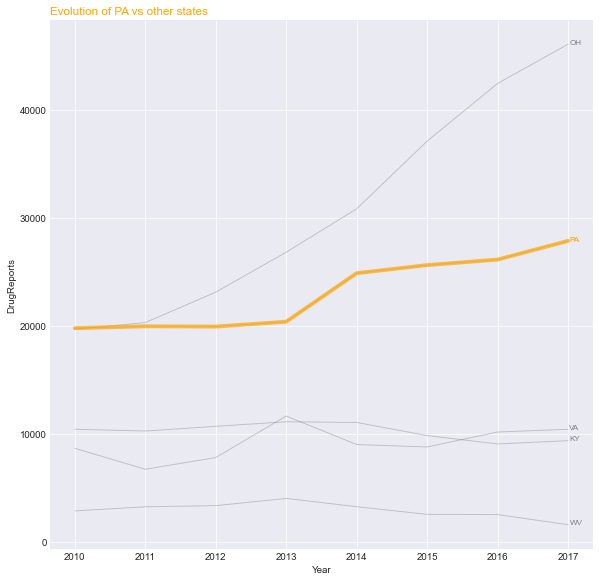

In [3]:
# 导入包
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# 导入数据集并转成方便作图的格式
Dataset = pd.read_csv('data/Drugs.csv')
group = Dataset.groupby(['YYYY','State']).agg('sum').reset_index()
df = group.pivot(index='YYYY', columns='State', values='DrugReports').reset_index()

# 设定式样
plt.style.use('seaborn-darkgrid')
 
# 绘图
plt.figure(figsize=(10, 10), dpi=70)
#  所有的线条都画成灰色
for column in df.drop('YYYY', axis=1):
    plt.plot(df['YYYY'], df[column], marker='', color='grey', linewidth=1, alpha=0.4)
# PA的特殊处理，用橘色且加粗
plt.plot(df['YYYY'], df['PA'], marker='', color='orange', linewidth=4, alpha=0.7)
 
# 设定每条线的label的位置，其他的都为灰色，PA的为橘色
num=0
for i in df.values[7][1:]:
    num+=1
    name=list(df)[num]
    if name != 'PA':
        plt.text(2017.02, i, name, horizontalalignment='left', size='small', color='grey')
# 特殊处理PA
plt.text(2017.02, df.PA.tail(1), 'PA', horizontalalignment='left', size='small', color='orange')
 
# 添加图的标题和XY轴的标签
plt.title("Evolution of PA vs other states", loc='left', fontsize=12, fontweight=0, color='orange')
plt.xlabel("Year")
plt.ylabel("DrugReports")

#### 多子图
一张图显示多条线过于拥挤的时候，可以分成多个小的子图来显示。    
多个子图对比的时候，需要注意，**X轴和Y轴的刻度大小需要严格一致**，不然会带来误导。

Text(1998, 60000, 'DrugReports')

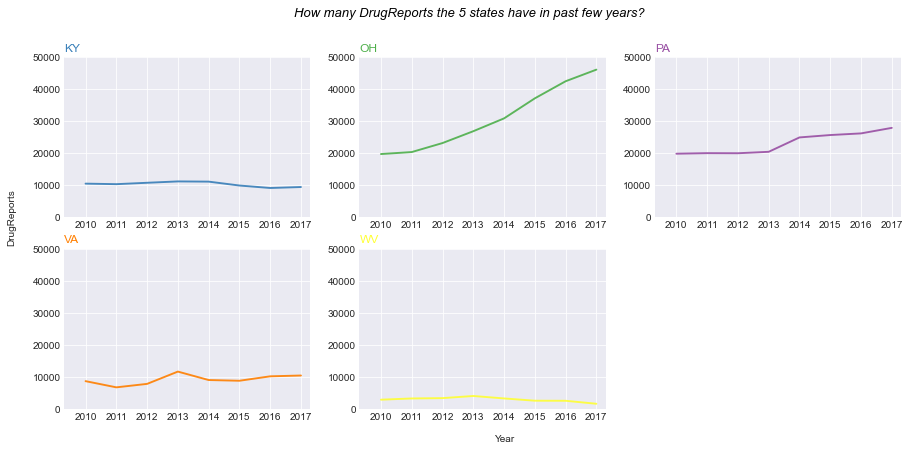

In [4]:
# 导入包
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# 导入数据集并转成方便作图的格式
Dataset = pd.read_csv('data/Drugs.csv')
group = Dataset.groupby(['YYYY','State']).agg('sum').reset_index()
df = group.pivot(index='YYYY', columns='State', values='DrugReports').reset_index()

# 初始化画布的设定
plt.style.use('seaborn-darkgrid') # 风格
palette = plt.get_cmap('Set1') # 颜色卡
plt.figure(figsize=(15, 10)) # 画布大小

# 绘制
num=0
for column in df.drop('YYYY', axis=1):
    num+=1
 
    # 设定子图在画布的位置
    plt.subplot(3,3, num)
 
    # 画线图
    plt.plot(df['YYYY'], df[column], marker='', color=palette(num), linewidth=1.9, alpha=0.9, label=column)
 
    # 设定子图的X轴和Y轴的范围，注意，这里所有的子图都是用同一套X轴和Y轴
    plt.xlim(2009.3,2017.3)
    plt.ylim(0,50000)
 
    # 添加每个子图的标题
    plt.title(column, loc='left', fontsize=12, fontweight=0, color=palette(num) )

# 添加整个画布的标题
plt.suptitle("How many DrugReports the 5 states have in past few years?", fontsize=13, fontweight=0, color='black', style='italic', y=0.95)
 
# 添加整个画布的横纵坐标的名称
plt.text(2014, -9500, 'Year', ha='center', va='center')
plt.text(1998, 60000, 'DrugReports', ha='center', va='center', rotation='vertical')


### 2.面积图 - Area chart
面积图和折线图从形式上看，非常相似。区别只是面积图在折线图的基础上，填充了折线下面的区域。可以用颜色或阴影去填充。  
有很多人钟情于面积图，因为区域的填充可以让人更直观的看出数据的变化趋势。  
  
**注意事项**
1. 是否要截断Y轴，见折线图部分。  
2. 如果需要对比两个或以上的类别，建议使用堆积面积图；如果一定要在单一面积图上表示，注意填充颜色一定要是透明色的，可以看到所有的线条。  
3. 注意图形的长宽比，让图形更易读一点。
4. 一个好的做法是，将线条和填充的颜色保持统一，填充的颜色设置一些透明度，这些的图形会更美观一点。  

面积跟折线图作图非常类似，我们只需多一步填充的操作。  
在python中，可以用`fill_between`和`stackplot`来实现。  
这里更推荐使用`fill_between`，在之后的定制化操作中更方便一点；`stackplot`更多的是用在堆积面积图中。  
  
`fill_between`和`stackplot`的输入都是两个数值变量。  
具体用法见下面参考代码

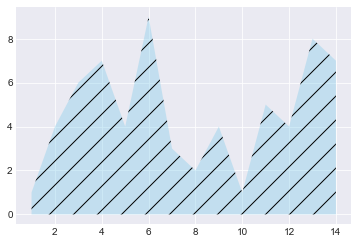

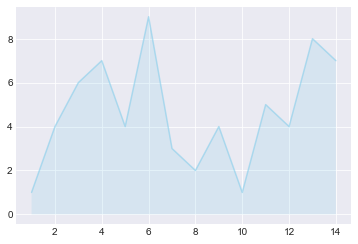

In [5]:
# 导入包
import numpy as np
import matplotlib.pyplot as plt

# 创建数据
x=range(1,15)
y=[1,4,6,7,4,9,3,2,4,1,5,4,8,7]
 
# 绘图
# facecolor：控制填充颜色，red/skyblue/blue 等
# alpha：    控制填充透明度
# hatch:     控制阴影式样{'/', '\', '|', '-', '+', 'x', 'o', 'O', '.', '*'}
plt.fill_between( x, y, facecolor="skyblue", alpha=0.4, hatch='/')
plt.show()
 
# 在填充的基础上，添加一条折线，图形更加清晰
plt.fill_between( x, y, facecolor="skyblue", alpha=0.2)
plt.plot(x, y, color="skyblue", alpha=0.6, linewidth=1.5) # 线的更多设置可以参考 line plot文档
plt.show()


### 3. 堆积面积图 - Stacked area chart
堆积面积图是基础面积图的一个延伸，它将多个类别的数据变化都显示在了一个图形中。  
它有以下特点：  
1. 不同于多折线图的线条可能相互交叉，堆积面积图不会出现不同分类的数据点被遮盖、被隐藏的状况。每个类别都是都是堆积在下面类别面积图之上的。
2. 堆积面积图与标准面积图不同，某一分类的值并非与纵坐标完全对应，而是通过折线之间的相对高度来表达。
3. 堆积面积图不仅可以展示各类的发展趋势(面积图和折线图都能表示这个)， 可以表达总体的发展趋势和个种类间的关系，比如重要程度，大致占比等。  
  
堆积图可以用`stackplot`函数绘制，它的数据输入方式可以是一个X和多个Y，也可以将多列Y的数据合并成一个，如下 

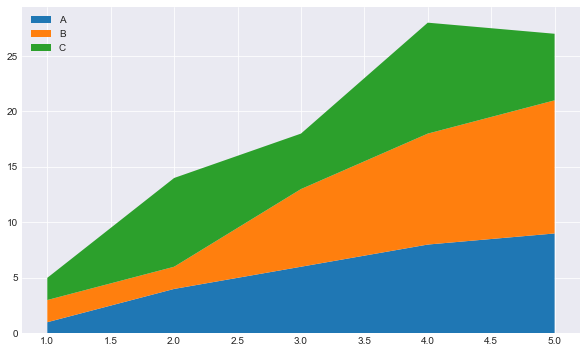

In [6]:
# library
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('seaborn-darkgrid') # 风格
plt.figure(figsize=(10, 6)) # 画布大小

# 方式一， y由三个序列组成
x=range(1,6)
y=[ [1,4,6,8,9], [2,2,7,10,12], [2,8,5,10,6] ]
 
# 绘图
plt.stackplot(x,y, labels=['A','B','C'])
plt.legend(loc='upper left')
plt.show()


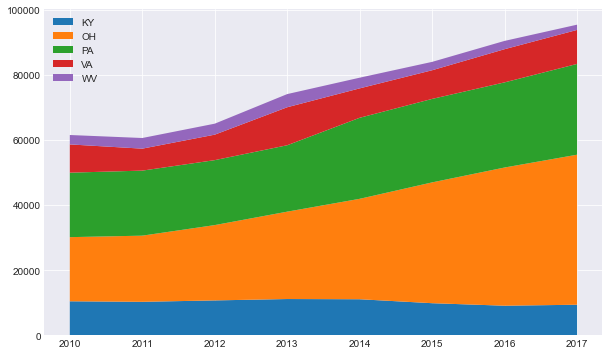

In [7]:
# 导入包
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# 导入数据集并转成方便作图的格式
Dataset = pd.read_csv('data/Drugs.csv')
group = Dataset.groupby(['YYYY','State']).agg('sum').reset_index()
df = group.pivot(index='YYYY', columns='State', values='DrugReports').reset_index()

plt.style.use('seaborn-darkgrid') # 风格
plt.figure(figsize=(10, 6)) # 画布大小

plt.stackplot(df['YYYY'],df['KY'],df['OH'],df['PA'],df['VA'],df['WV'], labels=df.iloc[:, 1:6].columns)
plt.legend(loc='upper left')
plt.show()

## 二、展示分布关系（Distribution）  

### 1.小提琴图 - Violin plot
小提琴图是用来展示多组数据的分布状态以及概率密度。这种图表结合了箱形图和密度图的特征。小提琴图的功能与箱型图类似。 它显示了一个（或多个）分类变量多个属性上的定量数据的分布，从而可以比较这些分布。与箱形图不同，其中所有绘图单元都与实际数据点对应，小提琴图描述了基础数据分布的核密度估计。

**注意事项**
1.不适合展示只有很少组别的数据  
2.按照中位数排序能让数据看起来更直观

小提琴图可以用seaborn包的`violinplot`方法实现，具体用法如下

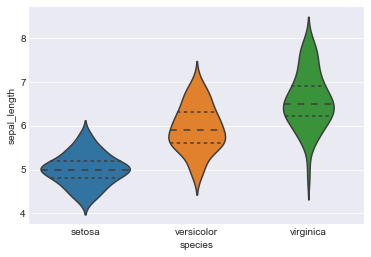

In [8]:
import seaborn as sns
df = pd.read_csv('data/iris.csv')

#根据分类变量分组绘制一个纵向的小提琴图：
sns.violinplot( x=df['species'],y=df["sepal_length"],inner='quartile' )#x代表不同的类别特征，y代表连续特征,inner代表在小提琴图中显示四分位数线

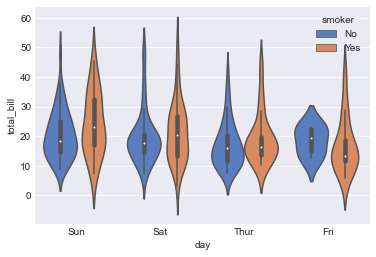

In [9]:
tips = pd.read_csv('data/tips.csv')
#根据2个分类变量嵌套分组绘制一个小提琴图
ax = sns.violinplot(x="day", y="total_bill", hue="smoker",data=tips, palette="muted")

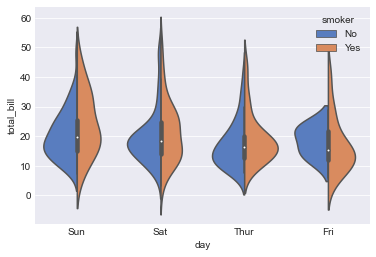

In [10]:
#绘制分割的小提琴图以比较不同的色调变量
ax = sns.violinplot(x="day", y="total_bill", hue="smoker",data=tips, palette="muted", split=True)

### 2.箱型图 - Box plot
箱形图（或盒须图）以一种利于变量之间比较或不同分类变量层次之间比较的方式来展示定量数据的分布。矩形框显示数据集的上下四分位数，而矩形框中延伸出的线段（触须）则用于显示其余数据的分布位置，剩下超过上下四分位间距的数据点则被视为“异常值”。

箱型图的基本作用如下：
**数据异常值**  
箱形图为我们提供了识别异常值的一个标准：异常值被定义为小于Q1－1.5IQR或大于Q3+1.5IQR的值。  
**偏态和尾重**  
箱型图揭示了数据批分布偏态和尾重的部分信息，尽管它们不能给出偏态和尾重程度的精确度量，但可作为我们粗略估计的依据。  
**数据的形状**  
同一数轴上，几批数据的箱形图并行排列，几批数据的中位数、尾长、异常值、分布区间等形状信息便一目了然。在一批数据中，哪几个数据点出类拔萃，哪些数据点表现不及一般，这些数据点放在同类其它群体中处于什么位置，可以通过比较各箱形图的异常值看出。

**注意事项**
1.箱型图隐藏了每个分组的数据量信息，可以通过标注或箱子宽度来展现  
2.箱型图隐藏了背后的分布信息，当数据量较少时可以使用数据抖动(jitter),当数据量较大时可以使用小提琴图来展现

箱型图可以直接使用seaborn的`boxplot`方法来实现。

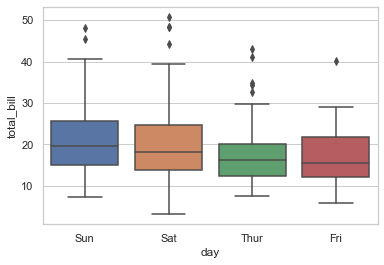

In [11]:
import seaborn as sns
sns.set(style="whitegrid")
tips = pd.read_csv('data/tips.csv')
#根据分类变量分组绘制一个纵向的箱型图
ax = sns.boxplot(x="day", y="total_bill", data=tips)

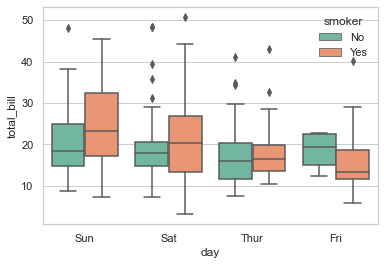

In [12]:
# 根据2个分类变量嵌套分组绘制一个箱型图
ax = sns.boxplot(x="day", y="total_bill", hue="smoker",data=tips, palette="Set2")

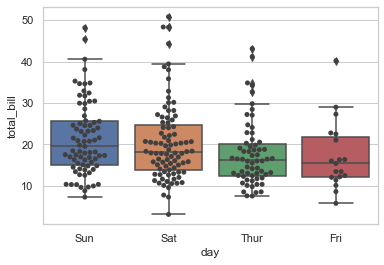

In [13]:
# 使用 swarmplot() 展示箱型图顶部的数据点
ax = sns.boxplot(x="day", y="total_bill", data=tips)
ax = sns.swarmplot(x="day", y="total_bill", data=tips, color=".25")

### 3.直方图（HIstogram）
直方图只能接收数值类型的变量数据，该变量被切割成几个箱子，每个箱子的高度代表处于分箱中的数量。

**注意事项**
1.使用过程中要注意分箱数量的选择  
2.不要用直方图展示超过5个变量的分布情况  
3.避免使用彩色  

可以使用seaborn中的`histplot`方法绘制直方图

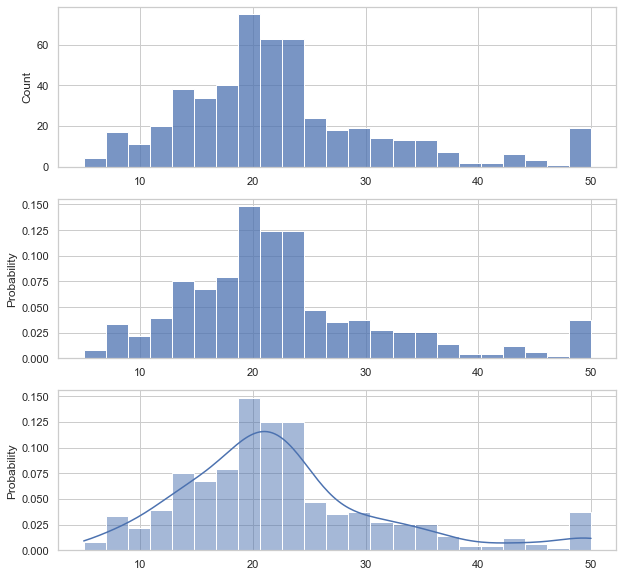

In [14]:
import pandas as pd
from sklearn.datasets import load_boston
boston=load_boston()
y = boston['target']

f, axs = plt.subplots(3,1,figsize=(10,10))
# 计数标准直方图
sns.histplot(y,stat='count',ax=axs[0])
# 归一化的直方图
sns.histplot(y,stat='probability',ax=axs[1])
# 在直方图上同时画出密度曲线
sns.histplot(y,stat='probability',kde=True,ax=axs[2])

### 4.密度图（Density）
密度图和直方图很类似，同样用来展示数值型变量的分布情况

**注意事项**  
1.注意密度函数的带宽  
2.不要用直方图展示超过5个变量的分布情况  
3.避免使用彩色  

可以使用seaborn中的`kdeplot`方法绘制直方图

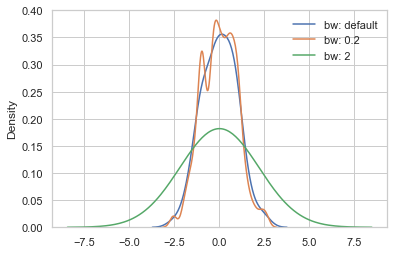

In [15]:
#kdeplot()中的bw参数控制着估计值与真实数据之间的贴近程度
#它与我们的KDE图的宽度相关。它提供了默认的规则来确定一个取值
x = np.random.normal(size=100)
sns.kdeplot(x, label="bw: default")
sns.kdeplot(x, bw_method=0.2, label="bw: 0.2")
sns.kdeplot(x, bw_method=2, label="bw: 2")
plt.legend();

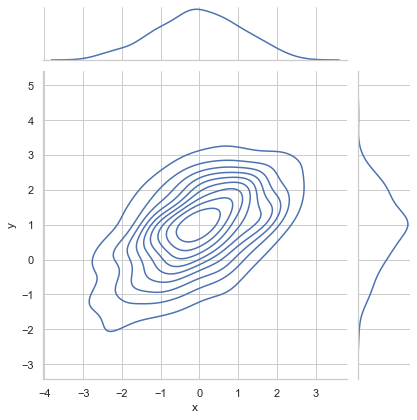

In [16]:
mean, cov = [0, 1], [(1, .5), (.5, 1)]
data = np.random.multivariate_normal(mean, cov, 200)
df = pd.DataFrame(data, columns=["x", "y"])
#核密度估计也适用于二元的情况。在seaborn中，这种图会以等高线的方式展示出来，我们可以用jointplot(kind="kde")来绘制
sns.jointplot(x="x", y="y", data=df, kind="kde")

## 三、展示相关关系（Correlation）

### 1.散点图（Scatter plot）
散点图常用于查看数值型变量之间的相关性，同时可以利用不同颜色来区分样本所属的类别

**注意事项**
绘制散点图时要避免Overplotting，意思是由于散点数量过多导致图中的样例点过度重合。  
为了避免overplotting，第一种方式可以通过抽样来作图，第二种方式可以用热力图代替，第三种方式是调节样本点的size

可以直接用matplotlib的`scatter`方法绘制散点图

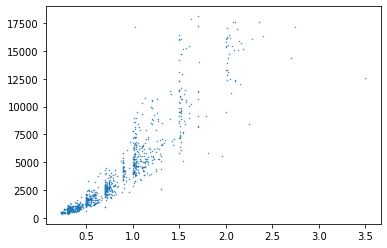

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
df = pd.read_csv('data\diamonds.csv').sample(1000)

# 绘制标准散点图
plt.scatter(df.carat, df.price, s=0.2)

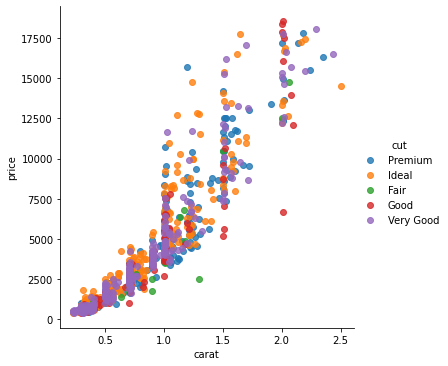

In [9]:
# 用颜色区别不同类别的散点
sns.lmplot(x='carat', y='price', data=df, hue='cut', fit_reg=False)

### 2.热力图（Heatmap）
密度图对于一组数值变量，可以理解为先对其进行二维分箱，再分别统计每个箱子的对应指标；对于分类变量而言，箱子一般可以指定为对应的类别。但通常，热力图更多用来表示数值变量的总体信息。

**注意事项**  
1.考虑到长尾分布等情况，经常需要对数据做标准化的预处理
2.经常需要对数据先进行分箱再绘图，对于类别变量而言，可以进行类别的合并；同时对于数值变量而言，既可以包含分位数分箱，也可以包含等间隔分箱

可以直接使用seaborn包的`heatmap`方法绘制热力图，用`jointplot`绘制蜂窝热力图

<AxesSubplot:xlabel='clarity', ylabel='cut'>

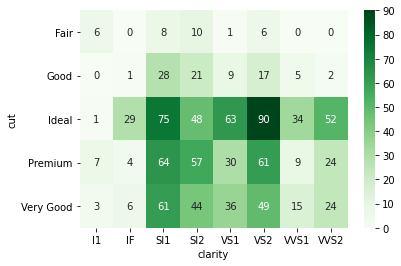

In [13]:
# 类别变量的统计
res = pd.crosstab(df.cut, df.clarity)
sns.heatmap(res, cmap='Greens', annot=True)

<AxesSubplot:xlabel='clarity', ylabel='price'>

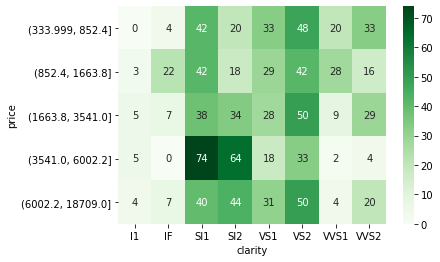

In [14]:
# 类别变量和数值变量分箱统计
res = pd.crosstab(pd.qcut(df.price, 5), df.clarity)
sns.heatmap(res, cmap='Greens', annot=True)

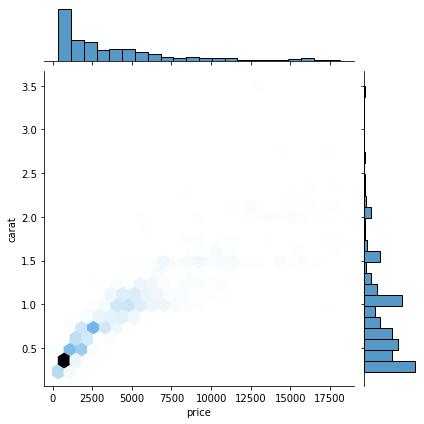

In [18]:
# 数值变量之间的密度图
sns.jointplot(x=df["price"], y=df["carat"], kind='hex')

在上述密度图作图时，由于原来的特征是长尾分布的，所以导致密度图的偏向性很高，此时可以考虑使用对数变换、分位数截断和标准差截断

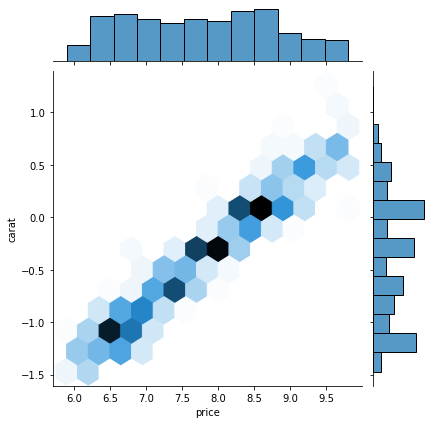

In [19]:
# 使用对数变换
sns.jointplot(x=np.log(df["price"]), y=np.log(df["carat"]), kind='hex')

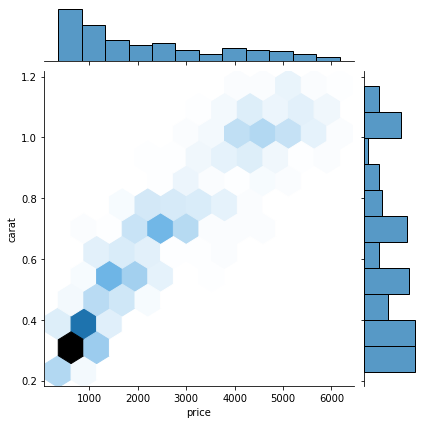

In [20]:
# 使用标准差截断
s1, s2 = df.price, df.carat
s1 = s1.mask((s1>(s1.median()+1*s1.std()))|(s1<(s1.median()-s1.std())))
s2 = s2.mask((s2>(s2.median()+1*s2.std()))|(s2<(s2.median()-s2.std())))
sns.jointplot(x=s1, y=s2, kind='hex')

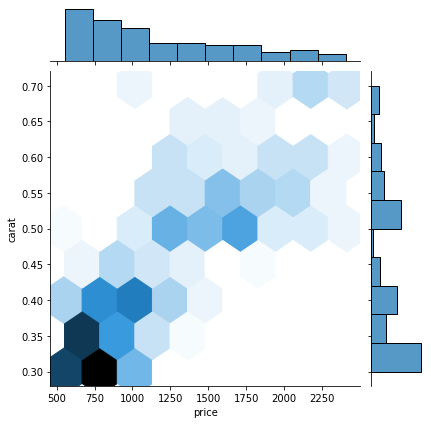

In [21]:
# 使用分位数截断
s1, s2 = df.price, df.carat
s1 = s1.mask((s1>(s1.quantile(0.5)))|(s1<(s1.quantile(0.05))))
s2 = s2.mask((s2>(s2.quantile(0.5)))|(s2<(s2.quantile(0.05))))
sns.jointplot(x=s1, y=s2, kind='hex')

### 3.气泡图（Bubble plot）
气泡图适用于超过二维特征的可视化，一般可以用气泡的颜色和大小来表示第三维、第四维的特征，可以认为气泡图是散点图的衍生

**注意事项**  
1.使用气泡面积而不是气泡的直径作为数值指标对比  
2.和散点图类似，气泡图同样要注意overplotting的问题

可以使用matplotlib的`scatter`方法绘制气泡图，同时用颜色和尺寸参数控制第三，第四维度

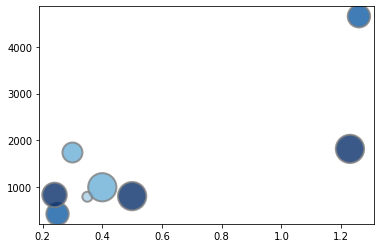

In [22]:
new_feature1 = np.random.randint(0, 10, 10) # 用气泡大小显示该feature大小
new_feature2 = np.random.randint(0, 10, 10) # 用气泡深浅显示该feature大小
plt.scatter(df.carat.sample(10), df.price.sample(10), s=new_feature1*100, c=new_feature2, cmap="Blues", alpha=0.8, edgecolors="grey", linewidth=2)

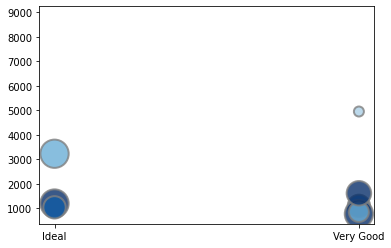

In [23]:
plt.scatter(df.cut.sample(10), df.price.sample(10), s=new_feature1*100, c=new_feature2, cmap="Blues", alpha=0.8, edgecolors="grey", linewidth=2)

## 四、展示排序信息（Ranking）

### 1.柱状图 - Barplot
柱状图用来展示一个类别变量和一个数值变量之间的关系，每个柱子代表一个类别，柱子的长度代表这个类别的数值。通常来说，柱状图是展示此类信息最有效的方式之一。

**注意事项**  
1.不要和直方图混淆  
2.类别标签较长时，可以采用横向柱状图  
3.给柱子排序通常更有利于展示信息  

可以直接用matplotlib的`bar`方法绘制柱状图

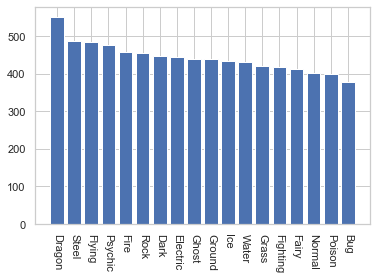

In [17]:
# 计算分类别的平均属性值
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pokemon = pd.read_csv('data/pokemon.csv')
data=pokemon.groupby('Type 1')['Total'].mean().sort_values(ascending=False).reset_index()
# 绘制柱状图
bars = data['Type 1']
pos = np.arange(len(bars))
plt.bar(pos, data['Total'])
plt.xticks(pos, bars,rotation=270)
plt.show()

### 2.雷达图 - Radar

雷达图是一种展示多个定量变量的二维图表，所有变量交汇在中心同一点，由于使用限制较多，在可视化中一般较少用到。

**注意事项**  
1.不要在一张图显示超过5个组别  
2.当不同组别标度差别很大时，谨慎使用雷达图

可以使用极坐标系和多边形填充的方式绘制雷达图，具体用法如下

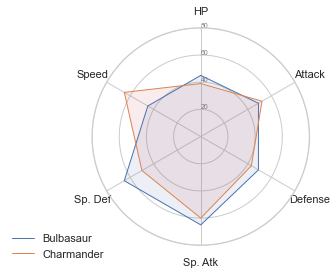

In [18]:
from math import pi
# 绘制背景，选择2只口袋妖怪，比较六维属性值
data = pokemon.loc[[0,4]]
categories=['HP','Attack','Defense','Sp. Atk','Sp. Def','Speed']
N=6
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]
ax = plt.subplot(111, polar=True)
ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)
plt.xticks(angles[:-1], categories)
ax.set_rlabel_position(0)
plt.yticks([20,40,60,80], ["20","40","60","80"], color="grey", size=7)
plt.ylim(0,80)
 
# 分别添加两个变量的雷达曲线
values= data.loc[0, ['HP','Attack','Defense','Sp. Atk','Sp. Def','Speed','HP']]
ax.plot(angles, values, linewidth=1, linestyle='solid', label=data.loc[0,'Name'])
ax.fill(angles, values, 'b', alpha=0.1)
 
values= data.loc[4, ['HP','Attack','Defense','Sp. Atk','Sp. Def','Speed','HP']]
ax.plot(angles, values, linewidth=1, linestyle='solid', label=data.loc[4,'Name'])
ax.fill(angles, values, 'r', alpha=0.1)

# 图例
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))

### 3.平行坐标图 - Parallel coordinates
平行坐标图用来比较样本在一组数值型变量上的特征，它是雷达图的另一种表现形式，在可视化中更推荐被使用。

**注意事项**    
1.不适合用于组别过多的情况  
2.可以在X轴对数据排序，避免曲线之间的交叉  

可以通过pandas.plotting中的parallel_coordinates方法绘制平行坐标图

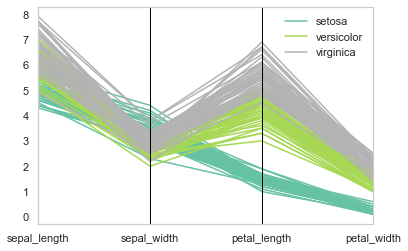

In [19]:
from pandas.plotting import parallel_coordinates
import seaborn as sns
import matplotlib.pyplot as plt
data =pd.read_csv('data/iris.csv')
 
# Make the plot
parallel_coordinates(data, 'species', colormap=plt.get_cmap("Set2"))
plt.show()

### 4.棒棒糖图 - Lollipop
棒棒糖图本质上是柱状图的另一种表现形式，区别是把柱子用线和点来代替，但是从视觉上表现效果更好。

**注意事项**  
1.排序会使得显示效果更好  
2.如果因为某种原因不能保持排序状态，那么宁愿选择柱状图  

可以使用`pyplot.hlines`方法来展示棒棒糖图

Text(0, 0.5, 'Type')

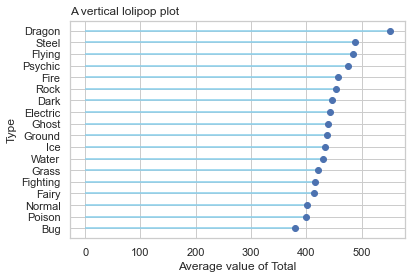

In [20]:
# 计算分类别的平均属性值
data=pokemon.groupby('Type 1')['Total'].mean().reset_index()
# 绘制棒棒糖图
data = data.sort_values(by='Total')
my_range=range(1,len(data.index)+1)
plt.hlines(y=my_range, xmin=0, xmax=data['Total'], color='skyblue')
plt.plot(data['Total'], my_range, "o")
plt.yticks(my_range, data['Type 1'])
plt.title("A vertical lolipop plot", loc='left')
plt.xlabel('Average value of Total')
plt.ylabel('Type')

### 5. 圆形柱状图 - Circular barplot
圆形柱状图相比于柱状图更吸引眼球，但同时也更难识别出柱子尺寸的差别，因此只有当你有大量类别需要展示，并且有一些明显突出的类别时才会使用。

**注意事项**  
1.内圈的比例不能太小，一般须超过外圈的三分之一
2.通常只有当你有很多类别需要展示时才会用（>40）

在matplotlib中，可以通过极坐标系下的柱状图加上内圈的圆来绘制圆形柱状图

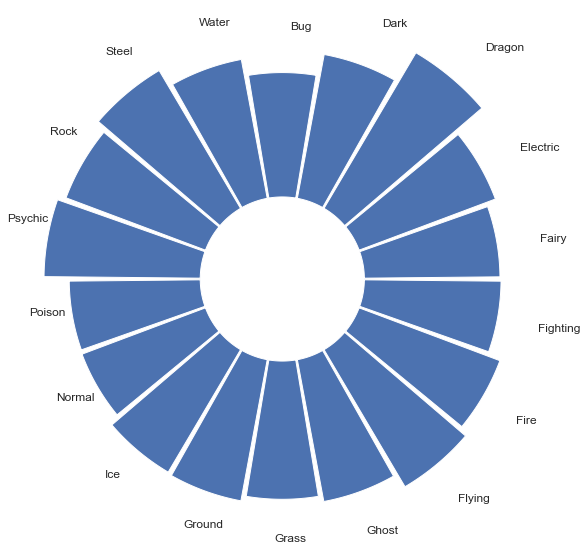

In [21]:
# 计算分类别的平均属性值
data=pokemon.groupby('Type 1')['Total'].mean().reset_index()
# 绘制圆形柱状图
N = len(data)
bottom = 250
value = data['Total']
theta = np.linspace(0.0, 2 * pi, N, endpoint=False)
width = (2*pi) / N-0.02
plt.figure(figsize = (16, 10))
ax = plt.subplot(111, polar=True)
bars = ax.bar(theta, value, width=width, bottom=bottom)
ax.set_theta_zero_location("N")
ax.set_theta_direction(-1)
ticks =data['Type 1']
for theta,tick,value in zip(theta,ticks,value):
    ax.text(theta+0.03, value+380,tick) 
plt.axis('off')
plt.show()

## 五、展示组成关系（Part of a whole）

### 1.饼图 - Pie chart
饼图在图像上是一个被分成若干部分的圆，用于反映每个部分对于整体所占的比重。

**注意事项**  
1.如果使用百分数，确保它加起来是100%  
2.不要使用3d和图例，使得图的阅读性更差  

饼图可以直接用`pyplot.pie`函数绘制，也可以调用pandas库的绘图接口`dataframe.plot`，具体用法如下

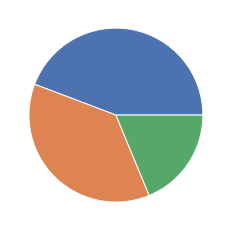

In [22]:
#绘制Pie chart
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots()  # 1*1画布

size = 0.3
vals = np.array([[60., 32.], [37., 40.], [29., 10.]])  # 3*2 array

cmap = plt.get_cmap("tab20c")  # Get a colormap instance, matplotlib.cm
outer_colors = cmap(np.arange(3)*4)  # cmap([0,4,8]), len(cmap.colors) -> 20
inner_colors = cmap(np.array([1,2,5,6,9,10]))

# 第一个环
ax.pie(vals.sum(axis=1))  # wedge object 控制圆环的宽度
plt.show()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000202EFDAC2B0>],
      dtype=object)

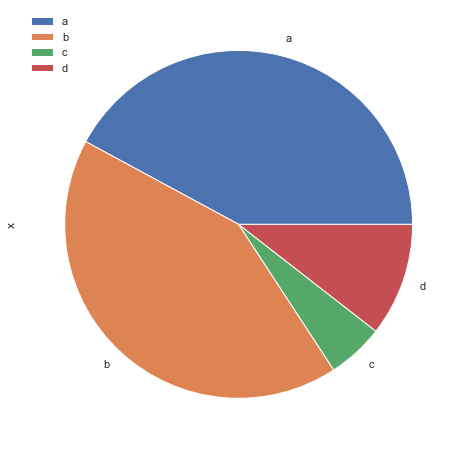

In [23]:
import pandas as pd
 
# --- dataset 1: just 4 values for 4 groups:
df = pd.DataFrame([8,8,1,2], index=['a', 'b', 'c', 'd'], columns=['x'])
 
# make the plot
df.plot(kind='pie', subplots=True, figsize=(8, 8))

### 2.甜甜圈图 - Donut chart

甜甜圈图和饼图极为类似，都是用来反映几个对象的组成比例，因而也有着相似的注意事项


**注意事项**
1.如果使用百分数，确保它加起来是100%  
2.不要使用3d和图例，使得图的阅读性更差 

在绘图时可以通过在饼图的中心画一个和底色相同的同心圆方式来绘制，具体用法如下

#### 基本甜甜圈图

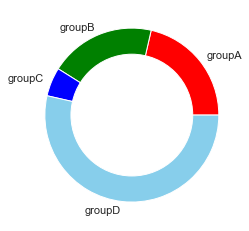

In [24]:
import matplotlib.pyplot as plt
 
# 创建数据
names='groupA', 'groupB', 'groupC', 'groupD',
size=[12,11,3,30]
 
# 在中心画一个白色的圆
my_circle=plt.Circle( (0,0), 0.7, color='white')

# 画外围的饼图
plt.pie(size, labels=names, colors=['red','green','blue','skyblue'])
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()


#### 有子分组的甜甜圈图

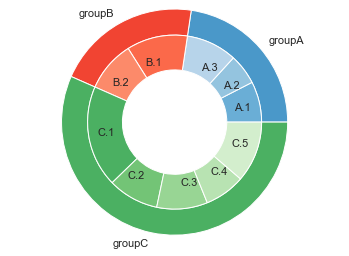

In [25]:
import matplotlib.pyplot as plt
 
# Make data: I have 3 groups and 7 subgroups
group_names=['groupA', 'groupB', 'groupC']
group_size=[12,11,30]
subgroup_names=['A.1', 'A.2', 'A.3', 'B.1', 'B.2', 'C.1', 'C.2', 'C.3', 'C.4', 'C.5']
subgroup_size=[4,3,5,6,5,10,5,5,4,6]
 
# Create colors
a, b, c=[plt.cm.Blues, plt.cm.Reds, plt.cm.Greens]
 
# First Ring (outside)
fig, ax = plt.subplots()
ax.axis('equal')
mypie, _ = ax.pie(group_size, radius=1.3, labels=group_names, colors=[a(0.6), b(0.6), c(0.6)] )
plt.setp( mypie, width=0.3, edgecolor='white')
 
# Second Ring (Inside)
mypie2, _ = ax.pie(subgroup_size, radius=1.3-0.3, labels=subgroup_names, labeldistance=0.7, colors=[a(0.5), a(0.4), a(0.3), b(0.5), b(0.4), c(0.6), c(0.5), c(0.4), c(0.3), c(0.2)])
plt.setp( mypie2, width=0.4, edgecolor='white')
plt.margins(0,0)
 
plt.show()

### 3.文氏图 - Venn diagram
文氏图用于表示不同集合的有限集合之间所有可能的逻辑关系，每个集合用一个圆表示，圆的大小反映了该组的重要性，组与组之间通常会有交叠，交叠的部分体现了不同组之间的交叉数据。 


**注意事项**
1.不建议绘制超过3个集合的venn图，超过3个集合的venn图不便于理解  
2.图中的数字指代集合之间交集的元素个数

文氏图可以利用matplotlib_venn包中的venn2和venn3方法绘制两个集合或三个集合的之间的逻辑关系。文氏图的数据类型可以是set或tuple  
- venn2方法中可以指定两个set的取值，venn2方法中可以指定3个set的取值
- 可以通过一个tuple指定集合之间的重叠关系，且在venn2方法中tuple只有前3个元素会被用于venn图绘制，在venn3方法中tuple只有前7个元素会被用于venn图绘制

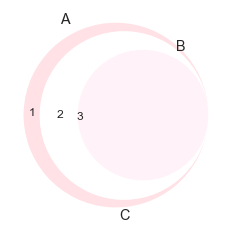

In [26]:
import matplotlib.pyplot as plt
from matplotlib_venn import venn2
from matplotlib_venn import venn3
venn3(subsets=[set([3, 2, 1,4,5,6]),set([2,3,4]),set([1,2,3,4,5])], set_labels=('A', 'B','C'),set_colors = ('lightpink','pink','pink'))

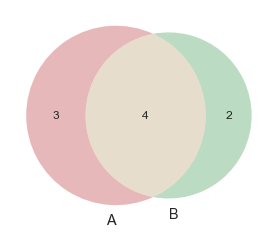

In [27]:
import matplotlib.pyplot as plt
from matplotlib_venn import venn2
from matplotlib_venn import venn3
venn2(subsets=(3, 2,4,1), set_labels=('A', 'B'),set_colors = ('r','g'))

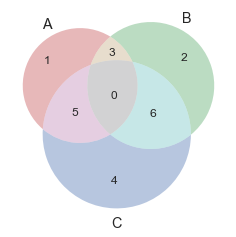

In [28]:
import matplotlib.pyplot as plt
from matplotlib_venn import venn2
from matplotlib_venn import venn3
venn3(subsets=(1,2,3,4,5,6,0), set_labels=('A', 'B','C'),set_colors = ('r','g','b'))

### 4.树图 - Treemap
树图将数据显示为一组嵌套的矩形，通过矩形的面积反映其取值大小，使用配色方案，可以表示多个维度:组、子组。  
树图的优势是充分利用了空间，使得在有限的空间内展示大量数据。

**注意事项**
1.不要在层次结构中注释超过3个级别，这会使图形不可读。  
2.优先考虑层次结构的最高层次

可以使用squarify包绘制树图，squarify的底层代码也是基于matplotlib实现的。

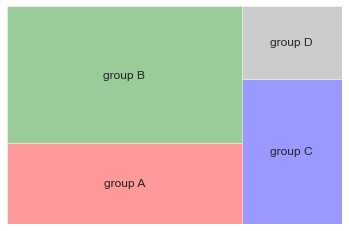

In [29]:
#绘制treemap
import matplotlib.pyplot as plt
import squarify # pip install squarify (algorithm for treemap)
 
# Change color
squarify.plot(sizes=[13,22,10,5], label=["group A", "group B", "group C", "group D"], color=["red","green","blue", "grey"], alpha=.4 )
plt.axis('off')
plt.show()

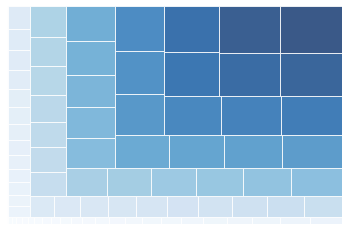

In [30]:
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import squarify # pip install squarify (algorithm for treemap)&lt;/pre&gt;

# Create a dataset:
my_values=[i**3 for i in range(1,100)]

# create a color palette, mapped to these values
cmap = matplotlib.cm.Blues
mini=min(my_values)
maxi=max(my_values)
norm = matplotlib.colors.Normalize(vmin=mini, vmax=maxi)
colors = [cmap(norm(value)) for value in my_values]

# Change color
squarify.plot(sizes=my_values, alpha=.8, color=colors )
plt.axis('off')
plt.show()

## 作业
**1.用Drugs数据集，做出面积图的多子图形式。**  
注意，需要添加如下要素：    
①添加每个子图标题，在子图右上方；  
②添加整个画布的总标题，在画布左上方；  
③添加X和Y轴的标签。  